# 计算物理第一次作业

祝茗 2024202020022

## Bessel 函数

Bessel 方程为

$$
x^2 \frac{\mathrm{d}^2 y}{\mathrm{d} x^2} + x \frac{\mathrm{d}x}{\mathrm{d}y} + (x^2 - n^2) y = 0
$$

其中 $n$ 被称为其对应 Bessel 方程的阶数。实际应用中最常见的情形为 $n$ 是整数，对应解称为 $n$ 阶 Bessel 函数 $J_n(x)$

Bessel 函数 $J_n(x)$ 之间有递推关系

$$
J_{n+1}(x) - \frac{2n}{x} J_n(x) + J_{n-1}(x) = 0 \tag{1}
$$

和一个求和恒等式

$$
\left[J_0(x)\right]^2 + 2 \sum_{n=1}^{\infty} [J_n(x)]^2 = 1 \tag{2}
$$

根据这两个关系，我们可以来绘制，当 $x=1,10$ 时 Bessel 函数 $J_n(x)$ 作为 $n$ 的函数图像。

可以预见的是

$$
\left|J_n(x)\right|_{n \to \infty} \to 0
$$

考虑到数值计算的精度，当 $n$ 大到一定程度 (例如 $n>M$ 时)，都小于计算机浮点数可以允许的精度

$$
\left|J_n(x)\right|_{n \ge M} \le eps
$$

所以我们可以做一个假设

$$
J_M(x) = 0, \quad J_{M-1} = 1
$$

然后根据递推关系，递推地算出其余 $J_n(x)$ 的相对大小，由于是齐次的线性的关系式，最后根据求和恒等式，就可以得到需要的答案。

## 导入前置的包并设置基本的参数

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jn

epsi = 1e-9

## 计算 Bessel 函数 $J_n(x)$

In [ ]:
def BesselJ_with_rescale(x: float | np.ndarray, M: int) -> np.ndarray:
    """计算 Bessel 函数 J_n(x) 的递推值，基于递推关系式。

    对 J_n(x) 进行归一化处理，防止数值溢出。

    Args:
        x (float): 自变量
        M (int): 返回的阶数

    Returns:
        np.ndarray: J_n(x) 的数组

    Example:
        >>> x = 1
        >>> Jn = BesselJ(x, 10)
        >>> plt.plot(x, Jn.T)
        >>> plt.show()
    """
    Jn = np.zeros(M + 1)
    Jn[M] = 0  # 假设 J_M(x) = 0
    Jn[M - 1] = 1  # 假设 J_{M-1}(x) = 1

    for n in range(M - 2, -1, -1):
        Jn[n] = (2 * (n + 1) / x) * Jn[n + 1] - Jn[n + 2]

        # 整体缩放，防止递推过程中数值溢出
        if abs(Jn[n]) > 1 / epsi:
            Jn *= epsi

    normalization_factor = np.sqrt(Jn[0] ** 2 + 2 * np.sum(Jn[1:] ** 2))
    Jn /= normalization_factor
    return Jn


def BesselJ_without_rescale(x: float | np.ndarray, M: int) -> np.ndarray:
    """计算 Bessel 函数 J_n(x) 的递推值，基于递推关系式。

    Args:
        x (float): 自变量
        M (int): 返回的阶数

    Returns:
        np.ndarray: J_n(x) 的数组

    Example:
        >>> x = np.linspace(0, 20, 100)
        >>> Jn = BesselJ(x, 10)
        >>> plt.plot(x, Jn.T)
        >>> plt.show()
    """
    Jn = np.zeros(M + 1)
    Jn[M] = 0  # 假设 J_M(x) = 0
    Jn[M - 1] = 1  # 假设 J_{M-1}(x) = 1

    for n in range(M - 2, -1, -1):
        Jn[n] = (2 * (n + 1) / x) * Jn[n + 1] - Jn[n + 2]

        # 不进行数值溢出处理
        # if abs(Jn[n]) > 1/epsi:
        #     Jn *= epsi

    normalization_factor = np.sqrt(Jn[0] ** 2 + 2 * np.sum(Jn[1:] ** 2))
    Jn /= normalization_factor
    return Jn

## 函数效果直观比较

### $x = 1, M = 20$

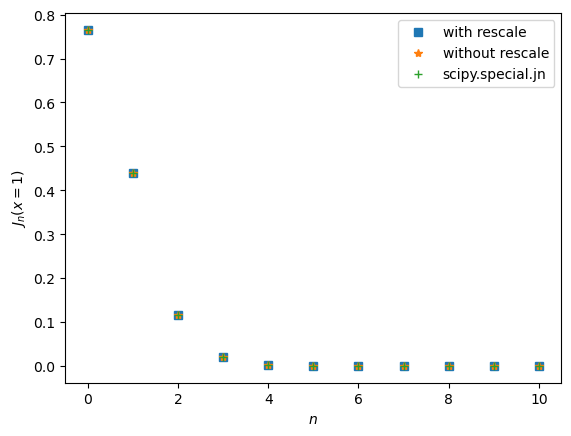

In [ ]:
x = 1
M = 20

J1 = BesselJ_with_rescale(x, M)
J2 = BesselJ_without_rescale(x, M)
J3 = np.array([jn(n, 1) for n in range(M + 1)])

# 前 m 个点的比较
m = 11
J1 = J1[:m]
J2 = J2[:m]
J3 = J3[:m]

fig = plt.figure()

plt.xlabel(f"$n$")
plt.ylabel(f"$J_n(x=1)$")

plt.plot(J1, "s", label="with rescale")
plt.plot(J2, "*", label="without rescale")
plt.plot(J3, "+", label="scipy.special.jn")
plt.legend()
plt.show()

$M$ 较小的时候，是否在递推过程中整体放缩影响不大。

### $x = 1, M = 90$

/tmp/ipykernel_13122/2824819278.py:62: RuntimeWarning: overflow encountered in scalar power
  normalization_factor = np.sqrt(Jn[0]**2 + 2 * np.sum(Jn[1:]**2))
/tmp/ipykernel_13122/2824819278.py:62: RuntimeWarning: overflow encountered in square
  normalization_factor = np.sqrt(Jn[0]**2 + 2 * np.sum(Jn[1:]**2))


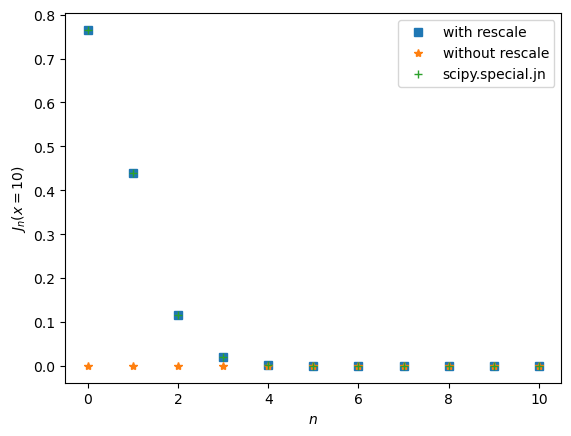

In [ ]:
x = 1
M = 90

J1 = BesselJ_with_rescale(x, M)
J2 = BesselJ_without_rescale(x, M)
J3 = np.array([jn(n, 1) for n in range(M + 1)])

# 前 m 个点的比较
m = 11
J1 = J1[:m]
J2 = J2[:m]
J3 = J3[:m]

fig = plt.figure()

plt.xlabel(f"$n$")
plt.ylabel(f"$J_n(x=10)$")

plt.plot(J1, "s", label="with rescale")
plt.plot(J2, "*", label="without rescale")
plt.plot(J3, "+", label="scipy.special.jn")
plt.legend()
plt.show()

$M$ 较大的时候，是否在递推过程中，如果不整体放缩，确实会对结果产生影响。

### $x = 10, M = 20$

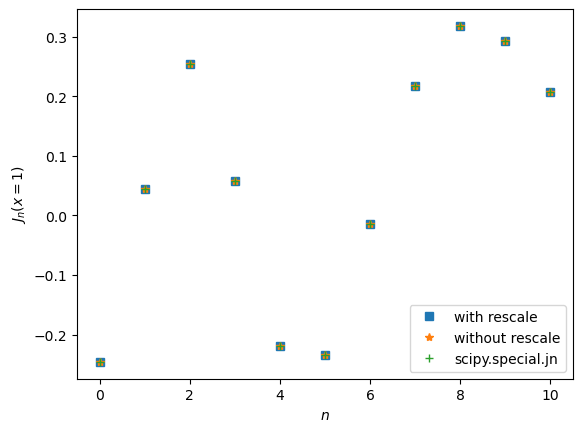

In [ ]:
x = 10
M = 20

J1 = BesselJ_with_rescale(x, M)
J2 = BesselJ_without_rescale(x, M)
J3 = np.array([jn(n, 10) for n in range(M + 1)])

# 前 m 个点的比较
m = 11
J1 = J1[:m]
J2 = J2[:m]
J3 = J3[:m]

fig = plt.figure()

plt.xlabel(f"$n$")
plt.ylabel(f"$J_n(x=1)$")

plt.plot(J1, "s", label="with rescale")
plt.plot(J2, "*", label="without rescale")
plt.plot(J3, "+", label="scipy.special.jn")
plt.legend()
plt.show()

$M$ 较小的时候，是否在递推过程中整体放缩影响不大。

### $x = 10, M = 200$

/tmp/ipykernel_13122/2824819278.py:62: RuntimeWarning: overflow encountered in scalar power
  normalization_factor = np.sqrt(Jn[0]**2 + 2 * np.sum(Jn[1:]**2))
/tmp/ipykernel_13122/2824819278.py:62: RuntimeWarning: overflow encountered in square
  normalization_factor = np.sqrt(Jn[0]**2 + 2 * np.sum(Jn[1:]**2))


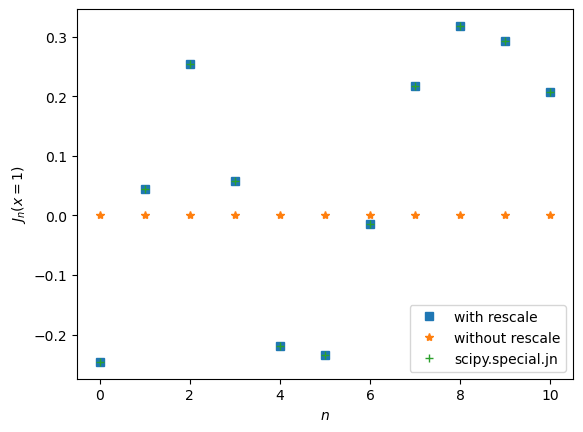

In [ ]:
x = 10
M = 200

J1 = BesselJ_with_rescale(x, M)
J2 = BesselJ_without_rescale(x, M)
J3 = np.array([jn(n, 10) for n in range(M + 1)])

# 前 m 个点的比较
m = 11
J1 = J1[:m]
J2 = J2[:m]
J3 = J3[:m]

fig = plt.figure()

plt.xlabel(f"$n$")
plt.ylabel(f"$J_n(x=1)$")

plt.plot(J1, "s", label="with rescale")
plt.plot(J2, "*", label="without rescale")
plt.plot(J3, "+", label="scipy.special.jn")
plt.legend()
plt.show()

$M$ 较大的时候，是否在递推过程中，如果不整体放缩，确实会对结果产生影响。

## 函数效果数值比较

之后部分只使用函数 BesselJ_with_rescale

In [ ]:
import os

import pandas as pd

# 读取数据文件
data_x1 = np.loadtxt(os.path.join("source", "bessel_x1.dat"))
data_x10 = np.loadtxt(os.path.join("source", "bessel_x10.dat"))

# dateframe
df_x1 = pd.DataFrame(data_x1, columns=["n", "J_n(x=1)"])
df_x10 = pd.DataFrame(data_x10, columns=["n", "J_n(x=10)"])

In [ ]:
cal_J1 = BesselJ_with_rescale(x=1, M=13)
df_x1["cal_J_n(x=1)"] = cal_J1
df_x1["error"] = df_x1["cal_J_n(x=1)"] - df_x1["J_n(x=1)"]
print(df_x1)

       n      J_n(x=1)  cal_J_n(x=1)         error
0    0.0  7.651977e-01  7.651977e-01 -4.203349e-11
1    1.0  4.400506e-01  4.400506e-01  4.493350e-11
2    2.0  1.149035e-01  1.149035e-01  3.190047e-11
3    3.0  1.956335e-02  1.956335e-02  2.668404e-12
4    4.0  2.476639e-03  2.476639e-03  1.099550e-13
5    5.0  2.497577e-04  2.497577e-04  1.123445e-14
6    6.0  2.093834e-05  2.093834e-05  2.389266e-15
7    7.0  1.502326e-06  1.502326e-06  4.368077e-16
8    8.0  9.422344e-08  9.422344e-08 -3.961428e-18
9    9.0  5.249250e-09  5.249250e-09 -1.904972e-19
10  10.0  2.630615e-10  2.630615e-10 -1.867515e-18
11  11.0  1.198007e-11  1.198003e-11 -3.661981e-17
12  12.0  4.999718e-13  4.991680e-13 -8.038662e-16
13  13.0  1.925617e-14  0.000000e+00 -1.925617e-14


In [ ]:
cal_J10 = BesselJ_with_rescale(x=10, M=34)
df_x10["cal_J_n(x=10)"] = cal_J10
df_x10["error"] = df_x10["cal_J_n(x=10)"] - df_x10["J_n(x=10)"]
print(df_x10)

       n     J_n(x=10)  cal_J_n(x=10)         error
0    0.0 -2.459358e-01  -2.459358e-01  4.865169e-11
1    1.0  4.347275e-02   4.347275e-02 -1.138492e-12
2    2.0  2.546303e-01   2.546303e-01 -1.487943e-11
3    3.0  5.837938e-02   5.837938e-02 -4.813268e-12
4    4.0 -2.196027e-01  -2.196027e-01 -2.008560e-12
5    5.0 -2.340615e-01  -2.340615e-01  1.320641e-11
6    6.0 -1.445884e-02  -1.445884e-02 -4.785042e-12
7    7.0  2.167109e-01   2.167109e-01 -1.494843e-11
8    8.0  3.178541e-01   3.178541e-01  4.385720e-11
9    9.0  2.918557e-01   2.918557e-01 -3.487999e-11
10  10.0  2.074861e-01   2.074861e-01  3.335879e-11
11  11.0  1.231165e-01   1.231165e-01  1.597597e-12
12  12.0  6.337025e-02   6.337025e-02  1.559863e-13
13  13.0  2.897208e-02   2.897208e-02 -3.223248e-12
14  14.0  1.195716e-02   1.195716e-02 -5.364268e-13
15  15.0  4.507973e-03   4.507973e-03 -2.787484e-13
16  16.0  1.566756e-03   1.566756e-03 -2.998205e-13
17  17.0  5.056467e-04   5.056467e-04  1.932460e-14
18  18.0  1.

可以看出符合的很好。